# Import Library

In [1]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 59.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [157]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.6 MB/s eta 0:00:00


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from featurewiz import featurewiz
pd.set_option('display.max_columns', None)

# Load Dataset

In [60]:
df = pd.read_excel('/content/drive/MyDrive/DS/mini project/employee retention/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')

In [61]:
df.head(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [63]:
df.describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


In [64]:
#checking null values
counts = df.isna().sum().sort_values(ascending=False)
#checking null values percentages
percentages = round(df.isna().mean() * 100, 3).sort_values(ascending=False)
#concat 
null_values = pd.concat([counts, percentages], axis=1, keys=["count", "%"])
null_values

,count,%
IkutProgramLOP,258,89.895
AlasanResign,66,22.997
JumlahKetidakhadiran,6,2.091
SkorKepuasanPegawai,5,1.742
JumlahKeikutsertaanProjek,3,1.045
JumlahKeterlambatanSebulanTerakhir,1,0.348
TanggalPenilaianKaryawan,0,0.000
TanggalHiring,0,0.000
TanggalLahir,0,0.000
PernahBekerja,0,0.000


In [65]:
#checking duplicated rows
df.duplicated().any()

False

In [66]:
#grouping columns based on columns type
cat = []
num = []

for col in df.columns: 
    if df[col].dtype == 'object':
        cat.append(col)
    else:
        num.append(col)

In [67]:
#count the unique values from each categorical columns
for col in cat:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count kolom Username:
--------------------------------------------------
boredEggs0           2
brainyMagpie7        2
spiritedPorpoise3    1
grudgingMeerkat3     1
boastfulSyrup4       1
                    ..
lazyPorpoise0        1
brainyFish3          1
sincereSeafowl4      1
jumpyTomatoe4        1
puzzledFish5         1
Name: Username, Length: 285, dtype: int64

Value count kolom StatusPernikahan:
--------------------------------------------------
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: StatusPernikahan, dtype: int64

Value count kolom JenisKelamin:
--------------------------------------------------
Wanita    167
Pria      120
Name: JenisKelamin, dtype: int64

Value count kolom StatusKepegawaian:
--------------------------------------------------
FullTime      217
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64

Value count kolom Pekerjaan:
----------------------------------------

# Data Preprocessing

In [68]:
df_pre = df.copy()

## handling missing values

In [69]:
# drop IkutProgramLOP because too many missing values
df_pre.drop('IkutProgramLOP', axis=1, inplace=True)

# impute missing values in AlasanResign column with modus because already too many unique values
df_pre['AlasanResign'].fillna(df_pre['AlasanResign'].mode()[0], inplace=True)

# impute missing values in JumlahKetidakhadiran column with median
df_pre['JumlahKetidakhadiran'].fillna(df_pre['JumlahKetidakhadiran'].median(), inplace=True)

# impute missing values in SkorKepuasanPegawai column with 0, assuming they are not satisfied 
df_pre['SkorKepuasanPegawai'].fillna(0, inplace=True)

# impute missing values in JumlahKeikutsertaanProjek column with median
df_pre['JumlahKeikutsertaanProjek'].fillna(df_pre['JumlahKeikutsertaanProjek'].median(), inplace=True)

# impute missing values in JumlahKeterlambatanSebulanTerakhir column with median
df_pre['JumlahKeterlambatanSebulanTerakhir'].fillna(df_pre['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)

In [70]:
# replace inappropriate value in PernahBekerja column 
df_pre['PernahBekerja'].replace(['yes'], 1, inplace=True)
df_pre['PernahBekerja'] = df_pre['PernahBekerja'].astype(int)

In [71]:
# replace inappropriate value in AlasanResign column
df_pre['AlasanResign'].replace(['Product Design (UI & UX)'], df_pre['AlasanResign'].mode()[0], inplace=True)

In [72]:
# checking unique values for each columns
df_pre.select_dtypes(exclude='object').nunique()

EnterpriseID                          287
SkorSurveyEngagement                    5
SkorKepuasanPegawai                     6
JumlahKeikutsertaanProjek               9
JumlahKeterlambatanSebulanTerakhir      7
JumlahKetidakhadiran                   22
PernahBekerja                           1
dtype: int64

In [73]:
# checking unique values for each columns
df_pre.select_dtypes(include='object').nunique()

Username                    285
StatusPernikahan              5
JenisKelamin                  2
StatusKepegawaian             3
Pekerjaan                    14
JenjangKarir                  3
PerformancePegawai            5
AsalDaerah                    5
HiringPlatform                9
NomorHP                     287
Email                       287
TingkatPendidikan             3
AlasanResign                 10
TanggalLahir                284
TanggalHiring                97
TanggalPenilaianKaryawan    127
TanggalResign                53
dtype: int64

# Annual Report on Employee Number Changes



In [74]:
df_pre.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
279,peacefulChamois3,106257,Belum_menikah,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,4.0,0.0,0.0,13.0,+6282208741xxx,peacefulChamois3574@icloud.com,Doktor,1,masih_bekerja,1980-04-18,2013-07-08,2020-1-22,-
241,chicPlover7,111572,Bercerai,Wanita,Outsource,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Diversity_Job_Fair,2,4.0,4.0,0.0,17.0,+6281366582xxx,chicPlover7178@hotmail.com,Sarjana,1,masih_bekerja,1987-06-14,2011-9-26,2014-8-15,-
201,insecureIcecream8,100620,Menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Sangat_bagus,Jakarta Timur,Google_Search,4,5.0,0.0,0.0,1.0,+6289797498xxx,insecureIcecream8676@yahoo.com,Magister,1,jam_kerja,1951-02-25,2011-04-04,2016-05-06,2017-11-15
86,sincereGatorade8,111089,Menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,3,5.0,7.0,0.0,2.0,+6281225029xxx,sincereGatorade8842@icloud.com,Sarjana,1,toxic_culture,1987-06-14,2016-10-02,2020-01-08,2017-3-15
10,puzzledCake4,105548,Belum_menikah,Pria,FullTime,Software Engineer (Front End),Mid_level,Kurang,Jakarta Timur,CareerBuilder,3,2.0,0.0,3.0,3.0,+6281263218xxx,puzzledCake4844@icloud.com,Sarjana,1,ganti_karir,1975-12-17,2010-7-20,2020-1-14,2019-01-12


In [75]:
# convert all 'Tanggal' columns to datetime type
datetime = []
for i in df_pre.columns.to_list():
  if 'Tanggal' in i:
    datetime.append(i)

In [76]:
df_pre['TanggalResign'].replace({'-':np.nan}, inplace=True)

In [77]:
for i in datetime:
  df_pre[i] = pd.to_datetime(df_pre[i])

In [78]:
df_pre['TahunHiring'] = df_pre['TanggalHiring'].dt.year
df_pre['TahunResign'] = df_pre['TanggalResign'].dt.year

In [79]:
dft1 = df_pre.groupby('TahunHiring').agg({'EnterpriseID' : 'count'}).reset_index()
dft1.rename(columns={'TahunHiring' : 'Tahun', 'EnterpriseID' : 'Jumlah Karyawan Masuk'}, inplace=True)
dft1

,Tahun,Jumlah Karyawan Masuk
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [80]:
dft2 = df_pre.groupby('TahunResign').agg({'EnterpriseID' : 'count'}).reset_index()
dft2.rename(columns={'TahunResign' : 'Tahun', 'EnterpriseID' : 'Jumlah Karyawan Keluar'}, inplace=True)
dft2

,Tahun,Jumlah Karyawan Keluar
0,2013.0,5
1,2014.0,12
2,2015.0,8
3,2016.0,8
4,2017.0,19
5,2018.0,26
6,2019.0,5
7,2020.0,6


In [81]:
# merge the 2 tables 
dft = dft1.merge(dft2, on='Tahun', how='outer').fillna(0).astype('int')
dft

,Tahun,Jumlah Karyawan Masuk,Jumlah Karyawan Keluar
0,2006,1,0
1,2007,2,0
2,2008,2,0
3,2009,7,0
4,2010,8,0
5,2011,76,0
6,2012,41,0
7,2013,43,5
8,2014,56,12
9,2015,31,8


In [82]:
# create 'perubahan' column to see value change every year
dft['perubahan'] = dft['Jumlah Karyawan Masuk'] - dft['Jumlah Karyawan Keluar']
dft

,Tahun,Jumlah Karyawan Masuk,Jumlah Karyawan Keluar,perubahan
0,2006,1,0,1
1,2007,2,0,2
2,2008,2,0,2
3,2009,7,0,7
4,2010,8,0,8
5,2011,76,0,76
6,2012,41,0,41
7,2013,43,5,38
8,2014,56,12,44
9,2015,31,8,23


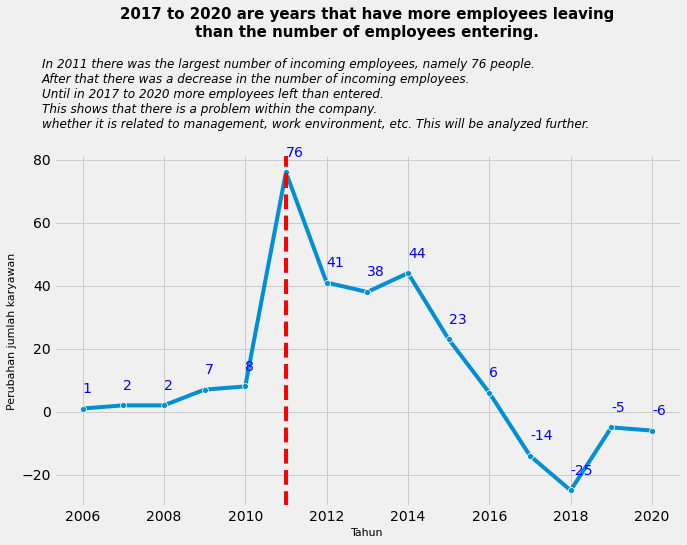

In [83]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,6))
plt.title('2017 to 2020 are years that have more employees leaving\nthan the number of employees entering.', fontsize=15, color='black', weight='bold', pad=120)
sns.lineplot(x = "Tahun", y = "perubahan", data=dft, marker="o")

plt.text(x=2005, y=90, s="In 2011 there was the largest number of incoming employees, namely 76 people.\nAfter that there was a decrease in the number of incoming employees.\nUntil in 2017 to 2020 more employees left than entered.\nThis shows that there is a problem within the company.\nwhether it is related to management, work environment, etc. This will be analyzed further.", fontsize=12, fontstyle='italic')
plt.xlabel('Tahun', fontsize=11)
plt.ylabel('Perubahan jumlah karyawan', fontsize=11)
plt.axvline(2011, ls='--', color='red')

# label points on the plot
for x, y in zip(dft['Tahun'], dft['perubahan']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x, # x-coordinate position of data label
 y = y+5, # y-coordinate position of data label, adjusted to be 150 below the data point
 s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
 color = 'blue') # set colour of line

sns.despine()
plt.show()

# Resign Reason Analysis for Employee Attrition Management Strategy

In [84]:
# create IsResign columns 
def resign(x):
  if pd.isnull(x['TanggalResign']):
    resign = 0
  else:
    resign = 1
  return resign

df_pre['IsResign'] = df_pre.apply(lambda x: resign(x), axis = 1)

In [85]:
df_pre['IsResign'].value_counts()

0    198
1     89
Name: IsResign, dtype: int64

In [86]:
dfr1 = df_pre[df_pre['IsResign'] == 0].groupby('Pekerjaan').agg({'IsResign' : 'count'}).reset_index()
dfr1.rename(columns={'IsResign' : 'Karyawan yang masih ada'}, inplace=True)
dfr1

,Pekerjaan,Karyawan yang masih ada
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


In [87]:
dfr2 = df_pre[df_pre['IsResign'] == 1].groupby('Pekerjaan').agg({'IsResign' : 'count'}).reset_index()
dfr2.rename(columns={'IsResign' : 'Karyawan yang sudah resign'}, inplace=True)
dfr2

,Pekerjaan,Karyawan yang sudah resign
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


In [88]:
# merge the 2 tables 
dfr = dfr1.merge(dfr2, on='Pekerjaan', how='outer').fillna(0)
dfr['Karyawan yang sudah resign'] = dfr['Karyawan yang sudah resign'].astype(int)
dfr

,Pekerjaan,Karyawan yang masih ada,Karyawan yang sudah resign
0,Data Analyst,8,8
1,Data Engineer,7,3
2,DevOps Engineer,3,0
3,Digital Product Manager,2,0
4,Machine Learning Engineer,2,0
5,Product Design (UI & UX),15,9
6,Product Design (UX Researcher),1,0
7,Product Manager,11,6
8,Scrum Master,3,0
9,Software Architect,1,0


In [89]:
dfr['jumlah employee'] = dfr['Karyawan yang masih ada'] + dfr['Karyawan yang sudah resign'] 
dfr['persentase'] = round(dfr['Karyawan yang masih ada'] / dfr['jumlah employee'] * 100, 2)
dfr.sort_values(by='persentase')

,Pekerjaan,Karyawan yang masih ada,Karyawan yang sudah resign,jumlah employee,persentase
0,Data Analyst,8,8,16,50.00
12,Software Engineer (Front End),44,28,72,61.11
5,Product Design (UI & UX),15,9,24,62.50
7,Product Manager,11,6,17,64.71
1,Data Engineer,7,3,10,70.00
10,Software Engineer (Android),17,7,24,70.83
11,Software Engineer (Back End),81,28,109,74.31
2,DevOps Engineer,3,0,3,100.00
3,Digital Product Manager,2,0,2,100.00
4,Machine Learning Engineer,2,0,2,100.00


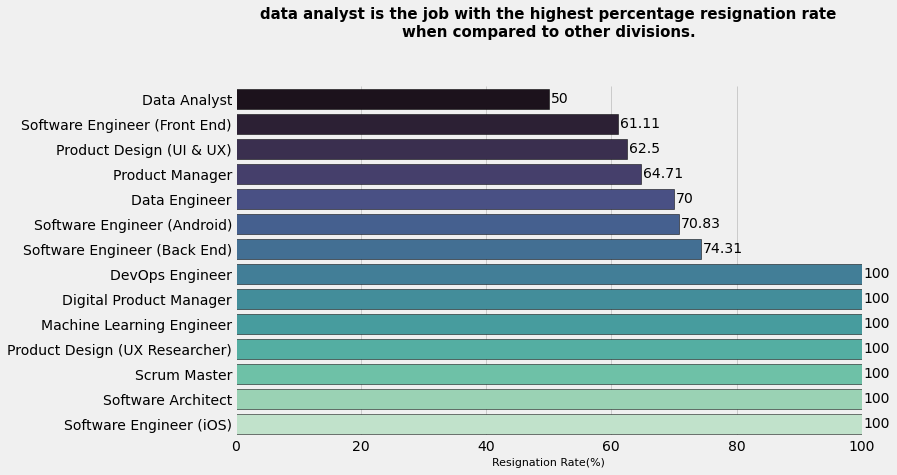

In [90]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("data analyst is the job with the highest percentage resignation rate\nwhen compared to other divisions.", fontsize=15, color='black', weight='bold', pad=50)
sns.barplot(x='persentase', y='Pekerjaan', data=dfr.sort_values(by='persentase'), edgecolor='black', palette='mako',  orient='h')

#plt.xlabel('Lead Time(s)', fontsize=11)
plt.xlabel('Resignation Rate(%)', fontsize=11)
plt.xlim(0, 100)
ax.set(ylabel=None)


plt.bar_label(ax.containers[0], padding=2)

#plt.axvline(3.5, ls='--', color='red')
#plt.axvline(4.5, ls='--', color='red')
#plt.stackplot(np.arange(3.5,5.5), [[100]], color='red', alpha=0.3)
#plt.text(x=3.75, y=93, s='Highest\nRate', fontsize=14, color='red', va='center')

sns.despine()
plt.show()

In [91]:
dar = df_pre[(df_pre['IsResign'] == 1) & (df_pre['Pekerjaan'] == 'Data Analyst')].groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).agg({'IsResign' : 'count'}).reset_index()
dar

,JenjangKarir,PerformancePegawai,AlasanResign,IsResign
0,Freshgraduate_program,Bagus,toxic_culture,1
1,Freshgraduate_program,Biasa,internal_conflict,1
2,Freshgraduate_program,Biasa,toxic_culture,1
3,Freshgraduate_program,Sangat_bagus,internal_conflict,1
4,Freshgraduate_program,Sangat_bagus,toxic_culture,3
5,Freshgraduate_program,Sangat_kurang,toxic_culture,1


In [92]:
fig = px.sunburst(dar, path=['AlasanResign', 'PerformancePegawai', 'JenjangKarir'], values='IsResign')
fig.show()

# Build an Automated Resignation Behavior Prediction using Machine Learning



In [93]:
df_pre1 = df_pre.copy()

In [94]:
# checking the data preprocessing again
#checking null values
counts = df_pre1.isna().sum().sort_values(ascending=False)
#checking null values percentages
percentages = round(df_pre1.isna().mean() * 100, 3).sort_values(ascending=False)
#concat 
null_values = pd.concat([counts, percentages], axis=1, keys=["count", "%"])
null_values

,count,%
TahunResign,198,68.99
TanggalResign,198,68.99
Username,0,0.00
JumlahKetidakhadiran,0,0.00
TahunHiring,0,0.00
TanggalPenilaianKaryawan,0,0.00
TanggalHiring,0,0.00
TanggalLahir,0,0.00
AlasanResign,0,0.00
PernahBekerja,0,0.00


In [95]:
df_pre1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [96]:
# impute missing value in TahunResign column and drop TanggalResign column
df_pre1['TahunResign'].fillna(0, inplace=True)
df_pre1.drop(columns='TanggalResign', axis = 1, inplace=True)

In [97]:
# checking duplicate again
df_pre.duplicated().any()

False

In [98]:
df_pre1.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TahunHiring,TahunResign,IsResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,2011,0.0,0
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2014,2018.0,1
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2011,2014.0,1
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,2014,0.0,0
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2013,2018.0,1


In [99]:
# drop columns with many unique values
df_pre1.drop(columns=['Username', 'EnterpriseID','JenisKelamin', 'NomorHP', 'Email', 'PernahBekerja', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'AsalDaerah', 'HiringPlatform', 'StatusPernikahan', 'StatusKepegawaian', 'TahunResign', 'TahunHiring'], axis = 1, inplace=True)

In [100]:
df_pre1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Pekerjaan                           287 non-null    object 
 1   JenjangKarir                        287 non-null    object 
 2   PerformancePegawai                  287 non-null    object 
 3   SkorSurveyEngagement                287 non-null    int64  
 4   SkorKepuasanPegawai                 287 non-null    float64
 5   JumlahKeikutsertaanProjek           287 non-null    float64
 6   JumlahKeterlambatanSebulanTerakhir  287 non-null    float64
 7   JumlahKetidakhadiran                287 non-null    float64
 8   TingkatPendidikan                   287 non-null    object 
 9   AlasanResign                        287 non-null    object 
 10  IsResign                            287 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usa

In [101]:
cats = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform'] 

for col in cats:
  print(f'value counts of column {col}')
  print(df_pre[col].value_counts())
  print('---'*10, '\n')

value counts of column StatusPernikahan
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: StatusPernikahan, dtype: int64
------------------------------ 

value counts of column JenisKelamin
Wanita    167
Pria      120
Name: JenisKelamin, dtype: int64
------------------------------ 

value counts of column StatusKepegawaian
FullTime      217
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64
------------------------------ 

value counts of column Pekerjaan
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       16
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2


In [102]:
from sklearn.preprocessing import LabelEncoder

# do label encode to ordinal columns (JenjangKarir and PerformancePegawai)
le = LabelEncoder()

df_pre1['JenjangKarir'] = le.fit_transform(df_pre1['JenjangKarir'])
df_pre1['PerformancePegawai'] = le.fit_transform(df_pre1['PerformancePegawai'])
df_pre1['TingkatPendidikan'] = le.fit_transform(df_pre1['TingkatPendidikan'])

In [103]:
df_pre1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Pekerjaan                           287 non-null    object 
 1   JenjangKarir                        287 non-null    int64  
 2   PerformancePegawai                  287 non-null    int64  
 3   SkorSurveyEngagement                287 non-null    int64  
 4   SkorKepuasanPegawai                 287 non-null    float64
 5   JumlahKeikutsertaanProjek           287 non-null    float64
 6   JumlahKeterlambatanSebulanTerakhir  287 non-null    float64
 7   JumlahKetidakhadiran                287 non-null    float64
 8   TingkatPendidikan                   287 non-null    int64  
 9   AlasanResign                        287 non-null    object 
 10  IsResign                            287 non-null    int64  
dtypes: float64(4), int64(5), object(2)
memory usa

In [104]:
# do one hot encoding for other categorical columns
ohe = ['Pekerjaan', 'AlasanResign'] 

for cats in ohe:
    onehots = pd.get_dummies(df_pre1[cats], prefix=cats)
    df_pre1 = df_pre1.join(onehots)

df_pre1.drop(columns=ohe, axis=1, inplace=True)

In [106]:
# do standardization for numerical columns
from sklearn.preprocessing import StandardScaler

stdcol = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']
ss = StandardScaler()

for col in stdcol:
   df_pre1[col] = ss.fit_transform(df_pre1[col].values.reshape(len(df_pre1), 1))

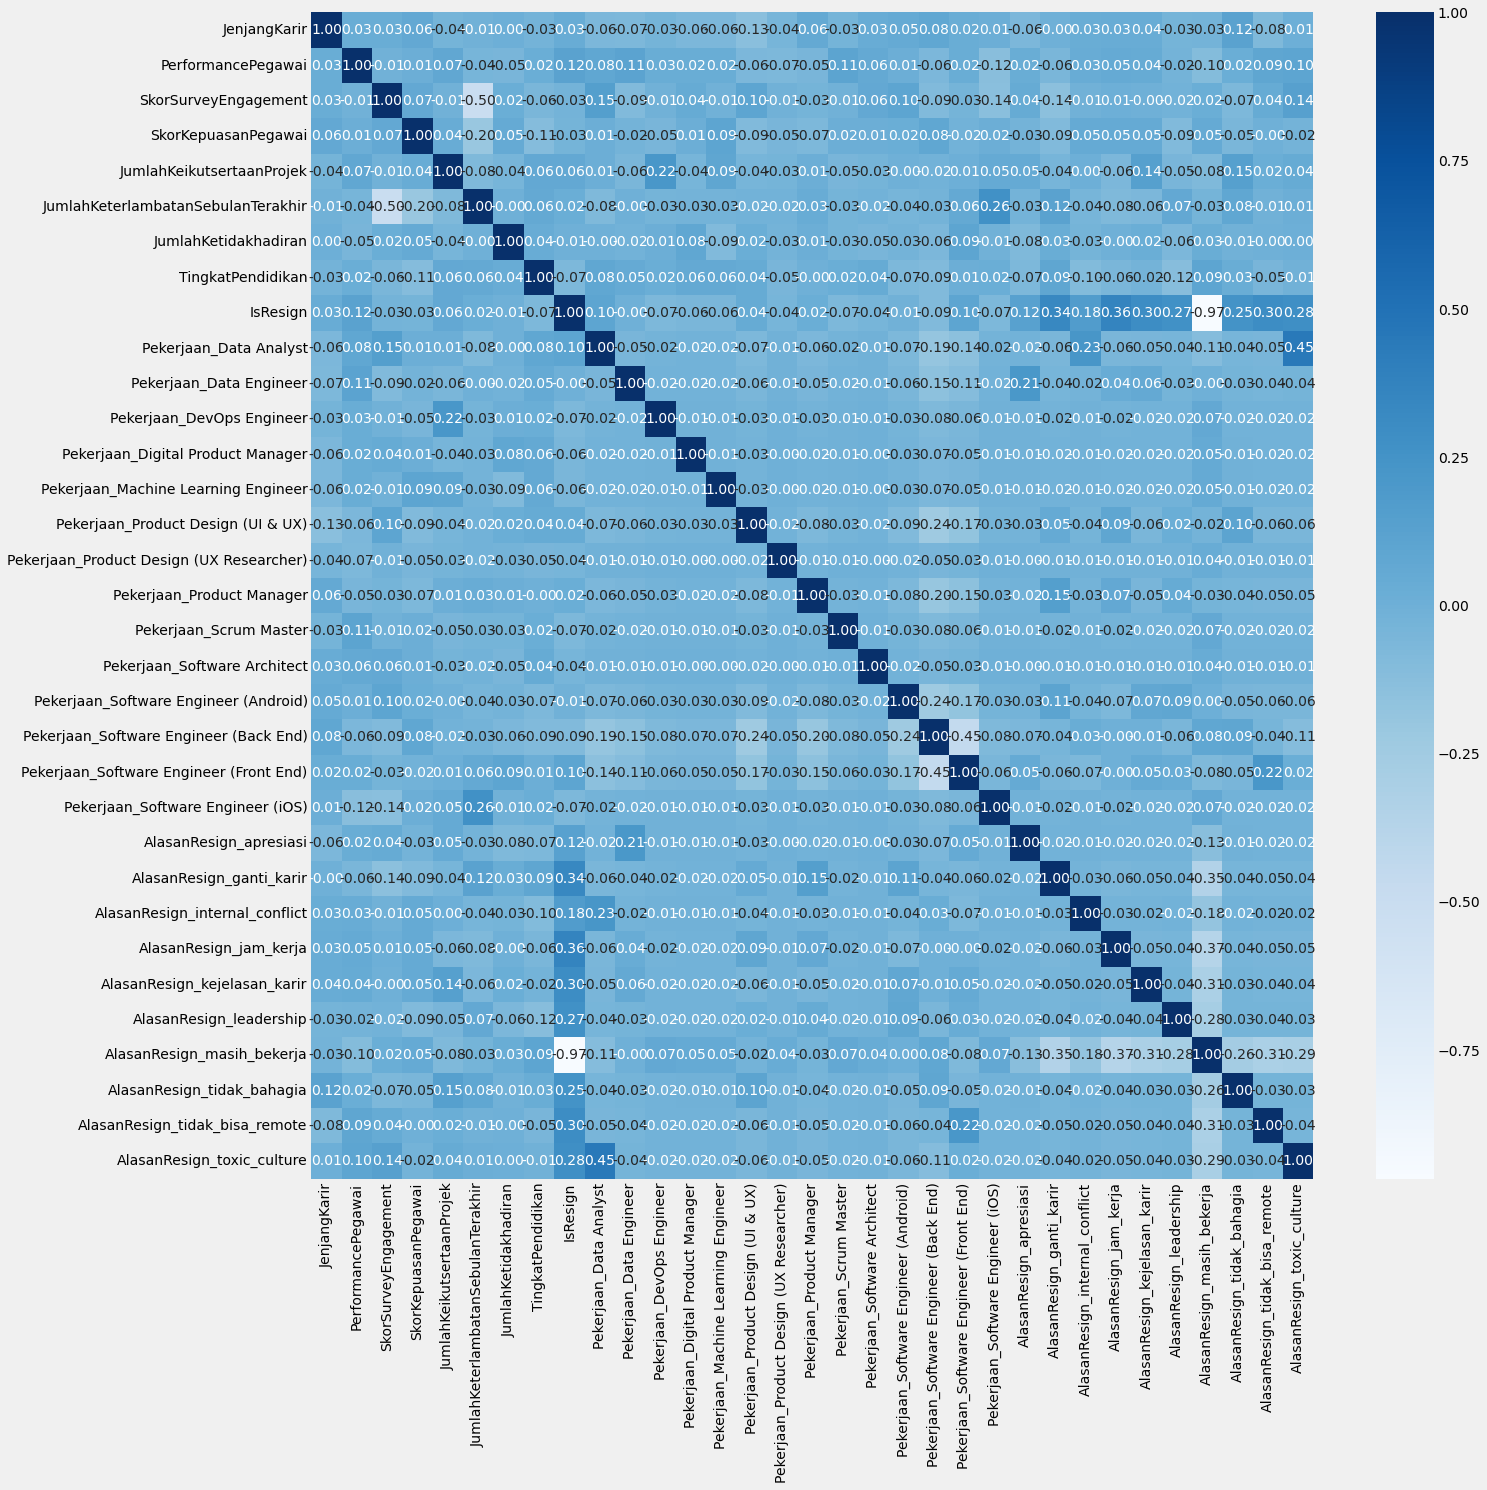

In [107]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_pre1.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [108]:
# drop columns with high correlation score
df_pre1.drop(columns='AlasanResign_masih_bekerja', axis=1, inplace=True)

In [109]:
X = df_pre1.drop(columns='IsResign', axis=1)
y = df_pre1['IsResign']
y.value_counts()

0    198
1     89
Name: IsResign, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
# overcome imbalanced target
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
ro = RandomOverSampler()
X_train_ro, y_train_ro = ro.fit_resample(X_train, y_train)

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_ro)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_ro)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_ro, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    #print('roc_auc (crossval train-mean): '+ str(score['train_score'].mean()))
    #print('roc_auc (crossval test-mean): '+ str(score['test_score'].mean()))
    #print('roc_auc (crossval train-std): '+ str(score['train_score'].std()))
    #print('roc_auc (crossval test-std): '+ str(score['test_score'].std()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [117]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train_ro, y_train_ro) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.97
Precision (Test Set): 1.00
Recall (Test Set): 0.91
F1-Score (Test Set): 0.95
roc_auc (test-proba): 0.96
roc_auc (train-proba): 0.99


In [118]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train_ro, y_train_ro) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.60
Precision (Test Set): 0.43
Recall (Test Set): 0.28
F1-Score (Test Set): 0.34
roc_auc (test-proba): 0.58
roc_auc (train-proba): 0.96


In [143]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42) # inisiasi object dengan nama dt
dt.fit(X_train_ro, y_train_ro) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.98
Precision (Test Set): 1.00
Recall (Test Set): 0.94
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00


In [121]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_ro, y_train_ro)
eval_classification(rf)

Accuracy (Test Set): 0.95
Precision (Test Set): 1.00
Recall (Test Set): 0.88
F1-Score (Test Set): 0.93
roc_auc (test-proba): 0.96
roc_auc (train-proba): 1.00


In [123]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_ro, y_train_ro)
eval_classification(nb)

Accuracy (Test Set): 0.98
Precision (Test Set): 1.00
Recall (Test Set): 0.94
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.98


In [124]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train_ro, y_train_ro)
eval_classification(xg)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.85
Recall (Test Set): 0.69
F1-Score (Test Set): 0.76
roc_auc (test-proba): 0.89
roc_auc (train-proba): 1.00


The best algortihm that we choose is decision tree with the most highest overall score.

In [147]:
#decision tree hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

max_depth = [int(x) for x in np.linspace(1, 110, num = 30)]
min_samples_split = [2, 5, 10, 100]
min_samples_leaf = [1, 2, 4, 10, 20, 50] 
max_features = ['auto', 'sqrt']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features)

dt_tuned = RandomizedSearchCV(dt, hyperparameters, scoring='roc_auc', cv=5,random_state=42)
dt_tuned.fit(X_train_ro, y_train_ro)
eval_classification(dt_tuned)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.57
Recall (Test Set): 0.53
F1-Score (Test Set): 0.55
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.99


the hyperparameter tuning method make the score worst, so we will use the model without tuning.

In [151]:
from sklearn.metrics import classification_report, confusion_matrix

y_predicted = dt.predict(X_test)
confusion_matrix(y_test,y_predicted, labels=[1,0])

array([[30,  2],
       [ 0, 55]])

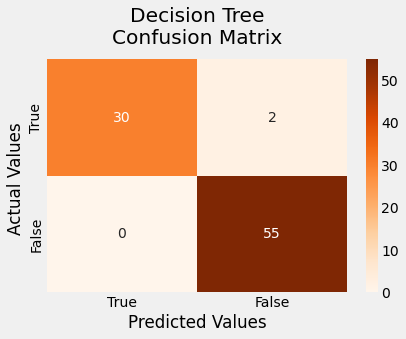

In [163]:
cf_matrix = confusion_matrix(y_test, y_predicted, labels=[1,0])
ax = sns.heatmap(cf_matrix, cmap='Oranges', annot=True)

plt.title('Decision Tree\nConfusion Matrix', pad=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

plt.show()

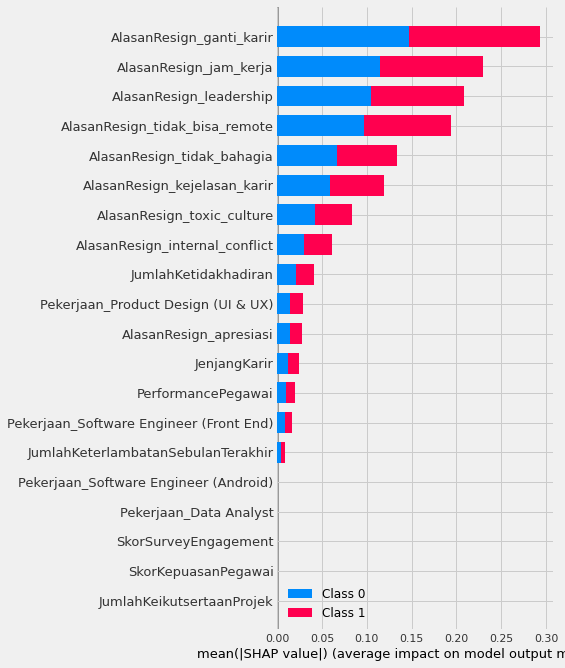

In [159]:
import shap
x_sampled = X_train_ro.sample(100, random_state=10)
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(x_sampled)
shap.summary_plot(shap_values, x_sampled, plot_type="bar")

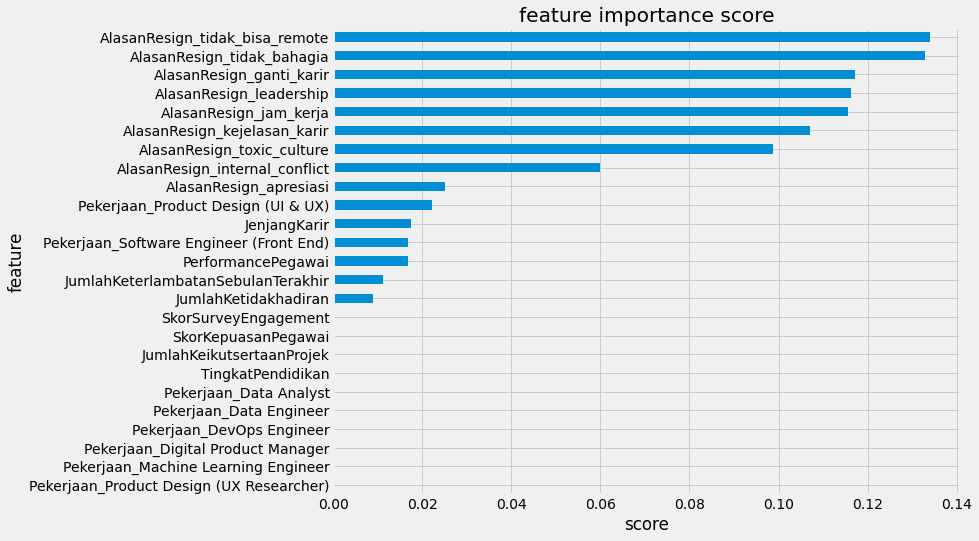

In [160]:
show_feature_importance(dt)